# Exploratory Data Analysis - Data

4 types of data are provided: 

1. Ticket Sales Data - sales data from the tickets purchased and scanned at the United Center

2. Email Engagement Data - these contain information about interactions attendees have with the emails sent before and after the game. There are two categories of files (send and clickthrough) for two types of emails (KBYG and postgame).

    * KBYG - know before you go emails are the pre-game emails
        
        1. Send Details

        2. Clickthrough Data

    * Postgame - postgame emails sent after the game
        
        1. Send Details

        2. Clickthrough Data

3. LiveA Demographic Data - 3rd Party Provider data to augment with ticket sales and email engagment data to profile individuals with demographic characteristics

4. Bulls Theme + Giveaway Schedule - schedule of promotional activity for each game. 



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

folder_path = os.getenv("MY_WORKSPACE", 'empty') + '/acl_spring_24_bulls2'
os.chdir(folder_path)

## Ticket Sales

### Ticket Sales Data Overview

This data represents tickets redeemed at the United Center for Chicago Bulls home games. Column names have been renamed to be more code-friendly. Below is the data dictionary:

### Event Information
| Code Friendly Name        | Description                                                  | Detail                                         | Field Type |
|---------------------------|--------------------------------------------------------------|------------------------------------------------|------------|
| season_name               | Indicates the NBA season of each event                       | NBA season runs from October to April          | CHARACTER  |
| event_date                | The date of the game for which tickets were redeemed         |                                                | DATE       |
| event_weekday             | The day of the week each game was held                       |                                                | CHARACTER  |
| opponent_short            | The nickname of the opposing team (city/location excluded)   | Example: Lakers, Pelicans                      | CHARACTER  |

### Ticket Purchase Information
| Code Friendly Name        | Description                                                  | Detail                                         | Field Type |
|---------------------------|--------------------------------------------------------------|------------------------------------------------|------------|
| parent_ticket_categories  | Type of ticket purchased                                     | Group = group purchases, Individual: Resale Buyer, Package = Subscription | CHARACTER  |
| add_date                  | Date the tickets were purchased/added                        |                                                | DATE       |
| days_before_event         | Days in advance the ticket was purchased                     | Calculated from Add Date and Event Date        | INTEGER    |
| purchaser_email           | Email contact associated with the purchase record            |                                                | CHARACTER  |
| total_seats               | Total number of seats purchased in the transaction           |                                                | INTEGER    |
| seat_location             | Location in the United Center where the seats are located    | 100 Level = lower bowl of seats                 | CHARACTER  |
| seat_level                | Level of seat access within the United Center                | Lower Level = 100 Level, Club Level = 200 and 300 levels | CHARACTER  |

### Attendance Information
| Code Friendly Name        | Description                                                  | Detail                                         | Field Type |
|---------------------------|--------------------------------------------------------------|------------------------------------------------|------------|
| arrival_time              | DateTime of ticket scan at the gate                          | Blank = Un-scanned ticket                      | DATETIME   |
| attendee_email            | Email contact associated with the attendee                   |                                                | CHARACTER  |
| attendee_zip_code         | Zip code of the attendee's address                           |                                                | INTEGER    |
| mobile_scan               | Indicates if the ticket was scanned using a mobile device    | 1 = Mobile scan, 0 = Non-mobile scan, Blank = Un-scanned | BINARY     |
| scan_category             | Method used by the attendee to access the event              |                                                | CHARACTER  |

This dictionary serves as a reference for understanding and utilizing the data fields related to ticket sales for Chicago Bulls home games at the United Center.


In [4]:
# Load data from CSV file
df_tickets = pd.read_csv("data/raw/Ticket Sales Data/22-23 & 23-24 (through 3.14) Ticket Sales Data.csv", 
                      names = [
                        'season_name', 'event_date', 'event_weekday', 'opponent_short',
                        'parent_ticket_categories', 'add_date', 'days_before_event',
                        'purchaser_email', 'total_seats', 'seat_location', 'seat_level',
                        'arrival_time', 'attendee_email', 'attendee_zip_code', 'mobile_scan',
                        'scan_category'
                    ],
                    header = 0
                )


In [5]:
df_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570265 entries, 0 to 570264
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   season_name               570265 non-null  object 
 1   event_date                570265 non-null  object 
 2   event_weekday             570265 non-null  object 
 3   opponent_short            570265 non-null  object 
 4   parent_ticket_categories  570265 non-null  object 
 5   add_date                  570265 non-null  object 
 6   days_before_event         570265 non-null  int64  
 7   purchaser_email           563715 non-null  object 
 8   total_seats               570265 non-null  int64  
 9   seat_location             570265 non-null  object 
 10  seat_level                570265 non-null  object 
 11  arrival_time              526213 non-null  object 
 12  attendee_email            520524 non-null  object 
 13  attendee_zip_code         402632 non-null  o

The data needs to be adjusted to reflect the data types specified in the data dictionary. 

In [6]:
# Fix Date Data Types
df_tickets["event_date"] = pd.to_datetime(df_tickets['event_date'], format = "%d-%b-%y")
df_tickets["add_date"] = pd.to_datetime(df_tickets['add_date'], format = "%d-%b-%y")
df_tickets["arrival_time"] = pd.to_datetime(df_tickets['arrival_time'], format = "%m/%d/%y %H:%M")

# Convert mobile_scan to a boolean
df_tickets['mobile_scan'] = df_tickets.mobile_scan.astype("bool")

Filter to just the season ticket holders using the 'parent_ticket_categories' variable.

In [7]:
df_season = df_tickets[df_tickets['parent_ticket_categories'] == "Season"]

In [8]:
df_season.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270086 entries, 300179 to 570264
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   season_name               270086 non-null  object        
 1   event_date                270086 non-null  datetime64[ns]
 2   event_weekday             270086 non-null  object        
 3   opponent_short            270086 non-null  object        
 4   parent_ticket_categories  270086 non-null  object        
 5   add_date                  270086 non-null  datetime64[ns]
 6   days_before_event         270086 non-null  int64         
 7   purchaser_email           268908 non-null  object        
 8   total_seats               270086 non-null  int64         
 9   seat_location             270086 non-null  object        
 10  seat_level                270086 non-null  object        
 11  arrival_time              237206 non-null  datetime64[ns]
 12  at

In [9]:
df_season.describe()

,event_date,add_date,days_before_event,total_seats,arrival_time
count,270086,270086,270086.000000,270086.000000,237206
mean,2023-05-30 20:20:41.311286016,2022-09-15 19:45:03.112341760,257.024748,1.991147,2023-06-01 06:09:33.202279424
min,2022-10-04 00:00:00,2022-01-28 00:00:00,-61.000000,1.000000,2022-10-04 18:36:00
25%,2022-12-28 00:00:00,2022-01-28 00:00:00,177.000000,1.000000,2022-12-30 17:31:00
50%,2023-03-17 00:00:00,2022-08-17 00:00:00,269.000000,2.000000,2023-03-17 18:38:00
75%,2023-12-02 00:00:00,2023-02-01 00:00:00,336.000000,2.000000,2023-12-02 18:47:00
max,2024-03-14 00:00:00,2024-03-14 00:00:00,436.000000,14.000000,2024-03-14 20:52:00
std,NaN,NaN,101.241811,0.899302,NaN


In [10]:
df_season.describe(include=['O'])

,season_name,event_weekday,opponent_short,parent_ticket_categories,purchaser_email,seat_location,seat_level,attendee_email,attendee_zip_code,scan_category
count,270086,270086,270086,270086,268908,270086,270086,236956,201700,270086
unique,2,7,29,1,3891,6,5,116211,14895,5
top,2022-2023 Chicago Bulls,Wed,Bucks,Season,michaelsblechman@gmail.com,100 Level Center,Lower Level,michaelsblechman@gmail.com,60614,Web Browser
freq,159078,58950,16972,270086,527,77916,122890,279,4939,146121


In [11]:
df_tickets['parent_ticket_categories'].describe(include=['O'])

count     570265
unique         4
top       Season
freq      270086
Name: parent_ticket_categories, dtype: object

### Ticket Sales Data Summary

There are 270,068 season ticket purchasers that were scanned at Chicago Bulls games at the United Center over the 2022-2023 season and 2023-2024 (through March 19th) season. The data contains 15 columns. 

There are missing values in the `purchaser_email`, `attendee_email`, `arrival_time`, and `attendee_zip_code` columns.



## Email Engagement Data

The email engagment data is broken into two files corresponding to the pre-game and post-game email schedule. One email is sent before every Chicago Bulls game and another is sent after every game. The data collected in both of these files represents the clickthrough data for both types of email sent. Both files contain data for both the '22 - '23 season and '23 - '24 season. 

Everytime an attendee clicks a link on one of these emails a row is entered. 

The two types of email engagment data are: 
1. KBYG - Know Before You Go: these emails are sent before the game to ticket holders with pre-game instructions. Usually sent the same day. 
2. Post-Game: These emails are sent after the game with promotional material. 

Each of these types is complemented with send details data and clickthrough data.


### Email Send - Data Dictionary

We will rename the columns to make them more code friendly. Find the data dictionary below. 

| Variable Name                 | Code Friendly Name    | Description                                                   | Field Type |
|-------------------------------|-----------------------|---------------------------------------------------------------|------------|
| Email Send Date               | email_send_dt         | date and time the email was sent                              | DATE       |
| Email Group                   | email_group           | the email group as defined by the Bulls team                  | CHARACTER  |
| Email Name                    | email_name            | name of the email sent out                                    | CHARACTER  |
| Email Address                 | attendee_email        | email of the attendee of the game                             | CHARACTER  |
| Total Sends                   | total_sends           | number of sends                                               | INTEGER    |
| Total Delivered               | total_delivered       | number of delivers                                            | INTEGER    |
| Total Opens                   | total_opens           | number of opens                                               | INTEGER    |
| Unique Opens                  | unique_opens          | number of unique opens                                        | INTEGER    |
| Total Clickthroughs           | total_clickthroughs   | total count of click throughs                                 | INTEGER    |
| Unique Clickthroughs          | unique_clickthroughs  | the number of unique clickthroughs                            | INTEGER    |
| Season                        | season                | the season                                                    | CHARACTER  |
|                               | email_type            | the type of email: kbyg or post                               | CHARACTER  |



### Email Clickthrough - Data Dictionary

We will rename the columns to make them more code friendly. Find the data dictionary below. 

| Variable Name                 | Code Friendly Name    | Description                                                   | Field Type |
|-------------------------------|-----------------------|---------------------------------------------------------------|------------|
| Email Address                 | attendee_email        | email of the attendee of the game                             | CHARACTER  |
| Clickthrough Link             | clickthrough_url      | clickthrough link/URL                                         | CHARACTER  |
| Email Clickthrough Date/Time  | clickthrough_dt       | clickthrough date and time                                    | DATE       |
| Email Name                    | email_name            | name of the email sent out                                   | CHARACTER  |
| Total Clickthroughs           | total_clickthroughs   | total count of click throughs                                 | INTEGER    |
| Email Send Date               | email_send_dt         | date and time the email was sent                              | DATE       |
| Unique Clickthroughs          | unique_clickthroughs  | the number of unique clickthroughs                            | INTEGER    |
| Clickthrough Link Count       | clickthrough_link_count  | ????                                                       | INTEGER    |
| Season                        | season                | the season                                                    | CHARACTER  |
|                               | email_type            | the type of email: kbyg or post                               | CHARACTER  |

Since both data sets follow the same data structure we will concatenate the datasets. We have also added in a column to denote which type of email is sent. 

### Send Details Data

In [13]:
# Load data from CSV file
#Email Address,  Clickthrough Link,  Email Clickthrough Date/Time,  Email Name,Total Clickthroughs,Email Send Date,Unique Clickthroughs,Clickthrough Link Count,Season

df_kbyg_send = pd.read_csv("data/raw/Email Engagement Data/KBYG_Send Details_2223 and 2324 Seasons.csv"
                 , 
                    header = 0
                )
df_kbyg_send['email_type'] = 'kbyg'

df_post_send = pd.read_csv("data/raw/Email Engagement Data/Postgame Email_Send Details_2223 and 2324 seasons.csv"
                 , 

                    header = 0
                )
df_post_send['email_type'] = 'post'

if sum(df_kbyg_send.columns.isin(df_post_send.columns)) == len(df_kbyg_send.columns):
    df_kbyg_send.columns =  [
                        'email_send_dt', 'email_group', 'email_name', 'attendee_email',
                        'total_sends', 'total_delivered', 'total_opens', 'unique_opens',
                        'total_clickthroughs', 'unique_clickthroughs', 'season', 'email_type'
    ]
    df_post_send.columns =  [
                        'email_send_dt', 'email_group', 'email_name', 'attendee_email',
                        'total_sends', 'total_delivered', 'total_opens', 'unique_opens',
                        'total_clickthroughs', 'unique_clickthroughs', 'season', 'email_type'
    ]

    df_emails_send = pd.concat([df_kbyg_send, df_post_send])

    df_emails_send["email_send_dt"] = pd.to_datetime(df_emails_send['email_send_dt'], format = "%m/%d/%y %H:%M")

In [14]:
df_post_send.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233578 entries, 0 to 233577
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   email_send_dt         233578 non-null  object 
 1   email_group           233578 non-null  object 
 2   email_name            233578 non-null  object 
 3   attendee_email        233578 non-null  object 
 4   total_sends           233143 non-null  float64
 5   total_delivered       233143 non-null  float64
 6   total_opens           34277 non-null   float64
 7   unique_opens          233578 non-null  int64  
 8   total_clickthroughs   18634 non-null   float64
 9   unique_clickthroughs  233578 non-null  int64  
 10  season                233578 non-null  int64  
 11  email_type            233578 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 21.4+ MB


In [15]:
df_emails_send.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628052 entries, 0 to 233577
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   email_send_dt         628052 non-null  datetime64[ns]
 1   email_group           628052 non-null  object        
 2   email_name            628052 non-null  object        
 3   attendee_email        628052 non-null  object        
 4   total_sends           627442 non-null  float64       
 5   total_delivered       627096 non-null  float64       
 6   total_opens           91879 non-null   float64       
 7   unique_opens          628052 non-null  int64         
 8   total_clickthroughs   27706 non-null   float64       
 9   unique_clickthroughs  628052 non-null  int64         
 10  season                628052 non-null  int64         
 11  email_type            628052 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory us

In [16]:
df_emails_send.describe()

,email_send_dt,total_sends,total_delivered,total_opens,unique_opens,total_clickthroughs,unique_clickthroughs,season
count,628052,627442.000000,627096.000000,91879.000000,628052.000000,27706.000000,628052.000000,628052.000000
mean,2023-06-22 16:44:54.411291136,0.999449,0.975650,1.952133,0.146292,1.296975,0.044114,2268.860335
min,2022-10-22 16:00:00,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2223.000000
25%,2023-01-07 16:00:00,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2223.000000
50%,2023-03-30 11:00:00,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2223.000000
75%,2023-12-21 16:00:00,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,2324.000000
max,2024-03-17 12:00:00,1.000000,1.000000,235.000000,1.000000,30.000000,1.000000,2324.000000
std,NaN,0.023476,0.154134,2.807523,0.353399,0.911703,0.205349,50.286455


In [17]:
df_emails_send.describe(include=['O'])

,email_group,email_name,attendee_email,email_type
count,628052,628052,628052,628052
unique,1,116,286658,2
top,CB_Gameday,2023_CB_Marketing_Surveys_PostGame,willwhite9@gmail.com,kbyg
freq,628052,115588,140,394474


Now we have to filter for just those emails that correspond to season ticket holders from the tickets data. 

In [18]:
df_season_emails_send = df_emails_send[df_emails_send['attendee_email'].isin(df_season['attendee_email'].unique())]

In [19]:
df_season_emails_send[
    (df_season_emails_send['attendee_email'].isin(df_season['attendee_email'])) 
    & 
    (df_season_emails_send['email_type'] == 'post')
    ]

,email_send_dt,email_group,email_name,attendee_email,total_sends,total_delivered,total_opens,unique_opens,total_clickthroughs,unique_clickthroughs,season,email_type
0,2023-10-26 13:00:00,CB_Gameday,2023_CB_Marketing_Surveys_PostGame,113177jacob@gmail.com,1.0,1.0,1.0,1,1.0,1,2324,post
1,2023-10-26 13:00:00,CB_Gameday,2023_CB_Marketing_Surveys_PostGame,13zm13@gmail.com,1.0,1.0,NaN,0,NaN,0,2324,post
8,2023-10-26 13:00:00,CB_Gameday,2023_CB_Marketing_Surveys_PostGame,300bwlr@gmail.com,1.0,1.0,NaN,0,NaN,0,2324,post
21,2023-10-26 13:00:00,CB_Gameday,2023_CB_Marketing_Surveys_PostGame,90.j.magana4@gmail.com,1.0,1.0,1.0,1,3.0,1,2324,post
26,2023-10-26 13:00:00,CB_Gameday,2023_CB_Marketing_Surveys_PostGame,Ahdesai14@gmail.com,1.0,1.0,NaN,0,NaN,0,2324,post
...,...,...,...,...,...,...,...,...,...,...,...,...
233463,2023-04-10 13:00:00,CB_Gameday,2023_0409_CB_Ticketing_02_Postgame_Detroit_SGB,visuv82@gmail.com,1.0,1.0,NaN,0,NaN,0,2223,post
233517,2023-04-10 13:00:00,CB_Gameday,2023_0409_CB_Ticketing_02_Postgame_Detroit_SGB,xcarrillox88@gmail.com,1.0,1.0,NaN,0,NaN,0,2223,post
233523,2023-04-10 13:00:00,CB_Gameday,2023_0409_CB_Ticketing_02_Postgame_Detroit_SGB,xqin8@uic.edu,1.0,1.0,1.0,1,1.0,1,2223,post
233526,2023-04-10 13:00:00,CB_Gameday,2023_0409_CB_Ticketing_02_Postgame_Detroit_SGB,yaozhao@bu.edu,1.0,1.0,NaN,0,NaN,0,2223,post


In [20]:
df_season_emails_send.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222264 entries, 0 to 233571
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   email_send_dt         222264 non-null  datetime64[ns]
 1   email_group           222264 non-null  object        
 2   email_name            222264 non-null  object        
 3   attendee_email        222264 non-null  object        
 4   total_sends           222201 non-null  float64       
 5   total_delivered       222142 non-null  float64       
 6   total_opens           29666 non-null   float64       
 7   unique_opens          222264 non-null  int64         
 8   total_clickthroughs   5561 non-null    float64       
 9   unique_clickthroughs  222264 non-null  int64         
 10  season                222264 non-null  int64         
 11  email_type            222264 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory us

In [21]:
df_season_emails_send.describe()

,email_send_dt,total_sends,total_delivered,total_opens,unique_opens,total_clickthroughs,unique_clickthroughs,season
count,222264,222201.000000,222142.000000,29666.000000,222264.000000,5561.000000,222264.000000,222264.000000
mean,2023-06-10 13:02:09.332684800,0.999734,0.979365,1.999798,0.133472,1.319007,0.025020,2265.724967
min,2022-10-22 16:00:00,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2223.000000
25%,2022-12-31 14:00:00,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2223.000000
50%,2023-03-22 16:00:00,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2223.000000
75%,2023-12-12 16:00:00,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,2324.000000
max,2024-03-17 12:00:00,1.000000,1.000000,131.000000,1.000000,27.000000,1.000000,2324.000000
std,NaN,0.016293,0.142161,2.665155,0.340085,1.098894,0.156186,49.897997


In [22]:
df_season_emails_send.describe(include = ['O'])

,email_group,email_name,attendee_email,email_type
count,222264,222264,222264,222264
unique,1,116,70831,2
top,CB_Gameday,2023_CB_Marketing_Surveys_PostGame,qldos67@gmail.com,kbyg
freq,222264,13157,137,191411


Below is a histogram of the frequency of email sends by user. The vast majority of season ticketholder attendees are receiving just one email. 

<Axes: >

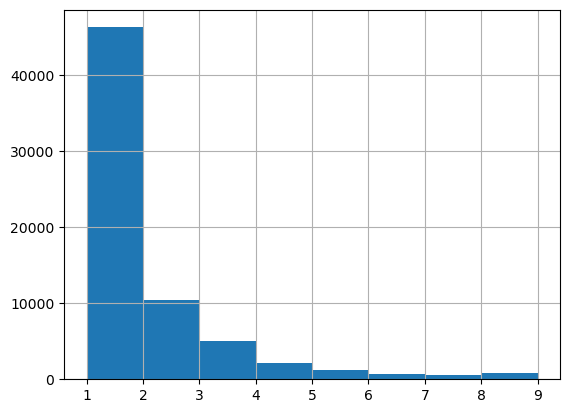

In [23]:
df_season_emails_send.groupby("attendee_email").count()['season'].hist(bins = range(1,10))

If we look at all the people who ar not season ticket holders, there is a much larger percentage of the recepients who are receiving two emails. 

<Axes: >

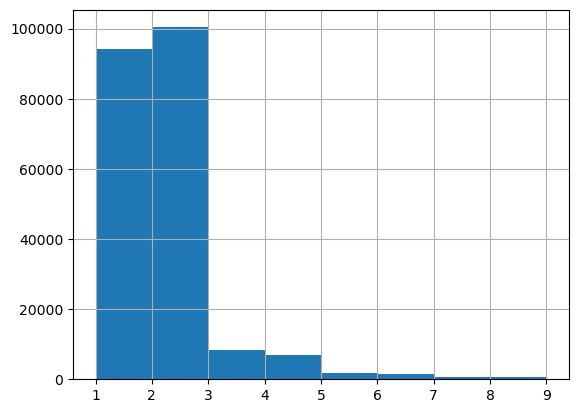

In [24]:
df_emails_send[~(df_emails_send["attendee_email"].isin(df_season_emails_send["attendee_email"]))].groupby("attendee_email").count()['season'].hist(bins = range(1,10))

### Clickthrough Data

In [25]:
# Load data from CSV file
#Email Address,  Clickthrough Link,  Email Clickthrough Date/Time,  Email Name,Total Clickthroughs,Email Send Date,Unique Clickthroughs,Clickthrough Link Count,Season

df_kbyg_ctr = pd.read_csv("data/raw/Email Engagement Data/KBYG Clickthrough Data_2223 and 2324 Seasons.csv"
                 , 
                      names = [
                        'attendee_email', 'clickthrough_url', 'clickthrough_dt',
                        'email_name', 'total_clickthroughs', 'email_send_dt',
                        'unique_clickthroughs', 'clickthrough_link_count', 'season'
                    ],
                    header = 0
                )
df_kbyg_ctr['email_type'] = 'kbyg'

df_post_ctr = pd.read_csv("data/raw/Email Engagement Data/Postgame Email Clickthrough_2223 and 2324 seasons.csv"
                 , 
                      names = [
                        'attendee_email', 'clickthrough_url', 'clickthrough_dt',
                        'email_name', 'total_clickthroughs', 'email_send_dt',
                        'unique_clickthroughs', 'clickthrough_link_count', 'season'
                    ],
                    header = 0
                )
df_post_ctr['email_type'] = 'post'

df_emails_ctr = pd.concat([df_kbyg_ctr, df_post_ctr])


In [26]:
# Fix Date Data Types
df_emails_ctr["clickthrough_dt"] = pd.to_datetime(df_emails_ctr['clickthrough_dt'], format = "%m/%d/%Y %H:%M")
df_emails_ctr["email_send_dt"] = pd.to_datetime(df_emails_ctr['email_send_dt'], format = "%m/%d/%Y %H:%M")

In [27]:
df_post_ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23383 entries, 0 to 23382
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   attendee_email           23383 non-null  object
 1   clickthrough_url         23383 non-null  object
 2   clickthrough_dt          23383 non-null  object
 3   email_name               23383 non-null  object
 4   total_clickthroughs      23383 non-null  int64 
 5   email_send_dt            23383 non-null  object
 6   unique_clickthroughs     23383 non-null  int64 
 7   clickthrough_link_count  23383 non-null  int64 
 8   season                   23383 non-null  int64 
 9   email_type               23383 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.8+ MB


In [28]:
df_emails_ctr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37613 entries, 0 to 23382
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   attendee_email           37613 non-null  object        
 1   clickthrough_url         37613 non-null  object        
 2   clickthrough_dt          37613 non-null  datetime64[ns]
 3   email_name               37613 non-null  object        
 4   total_clickthroughs      37613 non-null  int64         
 5   email_send_dt            37613 non-null  datetime64[ns]
 6   unique_clickthroughs     37613 non-null  int64         
 7   clickthrough_link_count  37613 non-null  int64         
 8   season                   37613 non-null  int64         
 9   email_type               37613 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 3.2+ MB


In [29]:
df_emails_ctr.describe()

,clickthrough_dt,total_clickthroughs,email_send_dt,unique_clickthroughs,clickthrough_link_count,season
count,37613,37613.000000,37613,37613.0,37613.000000,37613.000000
mean,2023-07-09 01:27:44.730811392,1.000239,2023-07-08 09:45:42.328450304,1.0,1.000239,2272.918645
min,2022-10-22 16:13:00,1.000000,2022-10-22 16:00:00,1.0,1.000000,2223.000000
25%,2023-01-14 15:22:00,1.000000,2023-01-14 14:00:00,1.0,1.000000,2223.000000
50%,2023-04-10 16:38:00,1.000000,2023-04-10 13:00:00,1.0,1.000000,2223.000000
75%,2023-12-31 13:07:00,1.000000,2023-12-30 16:00:00,1.0,1.000000,2324.000000
max,2024-03-20 12:16:00,2.000000,2024-03-19 12:00:00,1.0,2.000000,2324.000000
std,NaN,0.015467,NaN,0.0,0.015467,50.497325


In [30]:
df_emails_ctr.describe(include=['O'])

,attendee_email,clickthrough_url,email_name,email_type
count,37613,37613,37613,37613
unique,25295,47,120,2
top,lzerante@corpconc.com,https://bulls.qualtrics.com/jfe/form/SV_cNsSkl...,2023_CB_Marketing_Surveys_PostGame,post
freq,95,10731,11399,23383


Now we have to filter for just those emails that correspond to season ticket holders from the tickets data. 

In [31]:
df_season_emails_ctr = df_emails_ctr[df_emails_ctr['attendee_email'].isin(df_season['attendee_email'].unique())]

In [32]:
df_season_emails_ctr[
    (df_season_emails_ctr['attendee_email'].isin(df_season['attendee_email'])) 
    & 
    (df_season_emails_ctr['email_type'] == 'kbyg')
    ]

,attendee_email,clickthrough_url,clickthrough_dt,email_name,total_clickthroughs,email_send_dt,unique_clickthroughs,clickthrough_link_count,season,email_type
1,a.aroonlap@gmail.com,https://www.nba.com/bulls/iog,2023-10-25 18:44:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
8,alexastisevic17@gmail.com,https://spothero.app.link/ts1p2NqSe1,2023-10-25 17:30:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
9,alexastisevic17@gmail.com,https://www.nba.com/bulls/news/chicago-bulls-m...,2023-10-25 18:22:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
10,alexis.wiley56@gmail.com,https://www.unitedcenter.com/venue/dining/,2023-10-30 13:45:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
11,alexis.wiley56@gmail.com,https://www.unitedcenter.com/venue/dining/,2023-10-30 13:48:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
...,...,...,...,...,...,...,...,...,...,...
14219,tcarroll@carrollwall.com,https://www.nba.com/bulls/news/chicago-bulls-m...,2023-04-09 10:29:00,2023_0409_CB_Ticketing_01_Pregame_Detroit_SGB,1,2023-04-09 10:00:00,1,1,2223,kbyg
14224,tricomipierpaolo@gmail.com,https://www.nba.com/bulls/news/chicago-bulls-m...,2023-04-09 12:08:00,2023_0409_CB_Ticketing_01_Pregame_Detroit_SGB,1,2023-04-09 10:00:00,1,1,2223,kbyg
14225,tricomipierpaolo@gmail.com,https://www.nba.com/bulls/news/chicago-bulls-m...,2023-04-09 12:18:00,2023_0409_CB_Ticketing_01_Pregame_Detroit_SGB,1,2023-04-09 10:00:00,1,1,2223,kbyg
14227,van.hamme-boydens@telenet.be,https://www.nba.com/bulls/news/chicago-bulls-m...,2023-04-09 10:44:00,2023_0409_CB_Ticketing_01_Pregame_Detroit_SGB,1,2023-04-09 10:00:00,1,1,2223,kbyg


In [33]:
df_season_emails_ctr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8158 entries, 1 to 23372
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   attendee_email           8158 non-null   object        
 1   clickthrough_url         8158 non-null   object        
 2   clickthrough_dt          8158 non-null   datetime64[ns]
 3   email_name               8158 non-null   object        
 4   total_clickthroughs      8158 non-null   int64         
 5   email_send_dt            8158 non-null   datetime64[ns]
 6   unique_clickthroughs     8158 non-null   int64         
 7   clickthrough_link_count  8158 non-null   int64         
 8   season                   8158 non-null   int64         
 9   email_type               8158 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 701.1+ KB


In [34]:
df_season_emails_ctr.describe()

,clickthrough_dt,total_clickthroughs,email_send_dt,unique_clickthroughs,clickthrough_link_count,season
count,8158,8158.000000,8158,8158.0,8158.000000,8158.000000
mean,2023-06-25 18:07:12.378033920,1.000490,2023-06-25 01:19:15.724442368,1.0,1.000490,2270.305835
min,2022-10-22 16:13:00,1.000000,2022-10-22 16:00:00,1.0,1.000000,2223.000000
25%,2023-01-01 10:40:30,1.000000,2022-12-31 14:00:00,1.0,1.000000,2223.000000
50%,2023-04-02 17:54:30,1.000000,2023-04-02 12:00:00,1.0,1.000000,2223.000000
75%,2024-01-01 14:05:30,1.000000,2023-12-31 13:00:00,1.0,1.000000,2324.000000
max,2024-03-20 03:23:00,2.000000,2024-03-19 12:00:00,1.0,2.000000,2324.000000
std,NaN,0.022139,NaN,0.0,0.022139,50.401971


In [35]:
df_season_emails_ctr.describe(include=['O'])

,attendee_email,clickthrough_url,email_name,email_type
count,8158,8158,8158,8158
unique,4776,46,119,2
top,mephgrave@bacardi.com,https://bulls.qualtrics.com/jfe/form/SV_cNsSkl...,2023_CB_Marketing_Surveys_PostGame,kbyg
freq,44,1570,1282,5143


Below is a histogram of the frequency of link clicks by user. The vast majority of season ticketholder attendees are clicking only once. 

<Axes: >

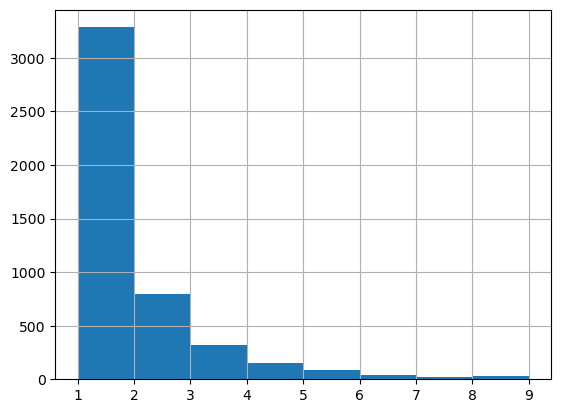

In [36]:
df_season_emails_ctr.groupby("attendee_email").count()['season'].hist(bins = range(1,10))

Looking at the most popular emails in terms of engagement for season ticketholder attendees points to a few of the most popular emails. Unsurprisingly, the marketing survey gets the most engagement (maybe there is an incentive to complete the survey). This will help us look into the features of the emails and the type of people responding to understand any relationships that would be valuable to exploit. 

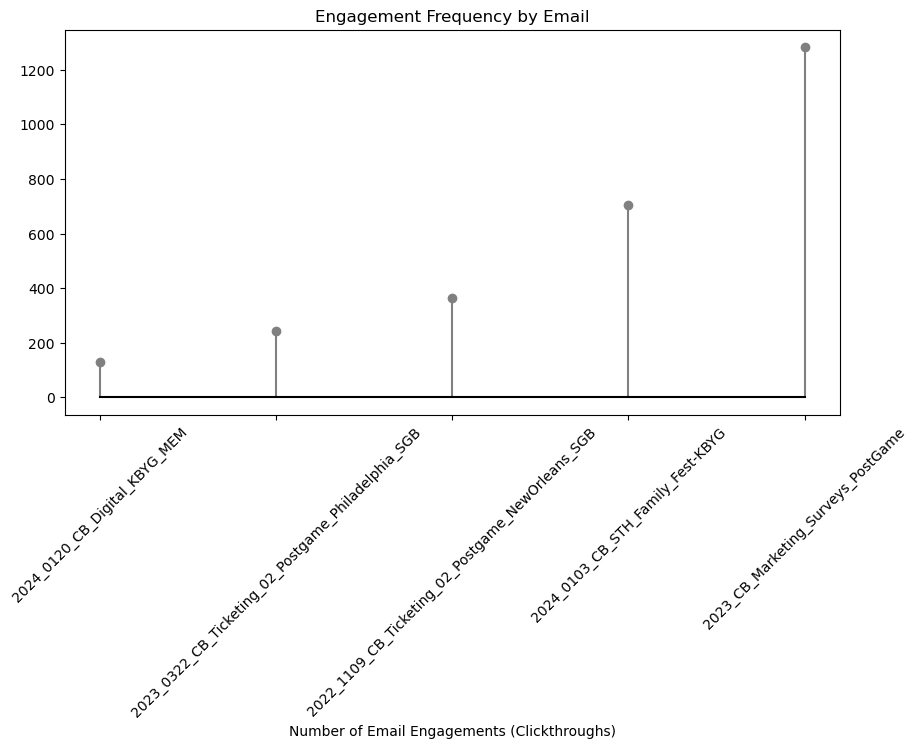

In [37]:
data_sorted = df_season_emails_ctr.groupby("email_name").count()['season'].reset_index().sort_values(by='season', ascending=True).tail(5)


plt.figure(figsize=(10, 5))
plt.stem(data_sorted['email_name'], data_sorted['season'], linefmt="grey", basefmt="black")
plt.xlabel('Number of Email Engagements (Clickthroughs)')
plt.xticks(rotation=45)  # Rotates labels to 45 degrees, use 90 for vertical labels
plt.title('Engagement Frequency by Email')
plt.show()

In [38]:
df_season_emails_ctr.head()

,attendee_email,clickthrough_url,clickthrough_dt,email_name,total_clickthroughs,email_send_dt,unique_clickthroughs,clickthrough_link_count,season,email_type
1,a.aroonlap@gmail.com,https://www.nba.com/bulls/iog,2023-10-25 18:44:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
8,alexastisevic17@gmail.com,https://spothero.app.link/ts1p2NqSe1,2023-10-25 17:30:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
9,alexastisevic17@gmail.com,https://www.nba.com/bulls/news/chicago-bulls-m...,2023-10-25 18:22:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
10,alexis.wiley56@gmail.com,https://www.unitedcenter.com/venue/dining/,2023-10-30 13:45:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg
11,alexis.wiley56@gmail.com,https://www.unitedcenter.com/venue/dining/,2023-10-30 13:48:00,2023_1025_CB_Digital_KBYG_OKC,1,2023-10-25 17:00:00,1,1,2324,kbyg


### Email Engagement Data Summary

There are 8,158 email clickthroughs by season ticket holder game attendees. This is a drop off from the 37K total email interactions. There are no nulls. The `unique_clickthroughs` columns is useless since all values indicate a clickthrough event occured and therefore is always equal to 1. 


In [39]:
print("Percentage of attendees that are season ticket holders: ", len(df_season['attendee_email'].unique())/len(df_tickets['attendee_email'].unique())*100, '%')
print("Percentage of email clickthroughs (engagement) made by season ticket holders: ", len(df_season_emails_ctr['attendee_email'].unique())/len(df_emails_ctr['attendee_email'].unique())*100, '%')

Percentage of attendees that are season ticket holders:  37.113257198334225 %
Percentage of email clickthroughs (engagement) made by season ticket holders:  18.881201818541214 %


**Interesting Fact**

While season ticket holders make up 37% of all gameday scans, they only make up 18.8% of the email engagement either before or after the game. This may point to an opportunity to increase season ticket holder engagement since they seem to engage less than their fair share. 

The response variable we intend to use will be based on this data. We will be looking for clusters in our data and hope to see stronger correlations with higher propensities to engage with the emails in those target customers. 

## Live Analytics Data 

The Live Anlaytics contains demographic data for ticketholder attendees. 

See the data dictionary for relevant information. 

In [40]:
df_liva23 = pd.read_csv("data/raw/LiveA Demographic Data/22-23 LiveA (Season Ticketholder Attendees).csv")

df_liva24 = pd.read_csv("data/raw/LiveA Demographic Data/23-24 LiveA (Season Ticketholder Attendees).csv")

/var/folders/3q/d621fwvs43q2f6s93g46njd00000gn/T/ipykernel_48273/1013811912.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_liva24 = pd.read_csv("data/raw/LiveA Demographic Data/23-24 LiveA (Season Ticketholder Attendees).csv")


In [41]:
#Check if all columns are the same in both data sets
sum(df_liva23.columns.isin(df_liva24.columns)) == 253

True

In [42]:
df_liva23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76884 entries, 0 to 76883
Columns: 253 entries, ult_party_id to vehicle_type
dtypes: float64(217), int64(1), object(35)
memory usage: 148.4+ MB


In [43]:
df_liva24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52016 entries, 0 to 52015
Columns: 253 entries, ult_party_id to vehicle_type
dtypes: float64(217), int64(1), object(35)
memory usage: 100.4+ MB


##  Chicago Bulls Home Game Promotional Schedule

This data captures the promotional schedule for both seasons. 

In [44]:
df_promos = pd.read_csv("data/raw/Bulls Theme + Giveaway Schedules.csv"
                        ,
                        names = ['event_date', 'opponent', 'start_ct', 'dameday_offer', 'primary_theme_partner', 'giveaway_partner', 'item_of_the_game']
                        , header = 0
                        )
df_promos['event_date'] = pd.to_datetime(df_promos['event_date'], format = "%m/%d/%y")

In [45]:
df_promos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   event_date             80 non-null     datetime64[ns]
 1   opponent               80 non-null     object        
 2   start_ct               80 non-null     object        
 3   dameday_offer          10 non-null     object        
 4   primary_theme_partner  58 non-null     object        
 5   giveaway_partner       32 non-null     object        
 6   item_of_the_game       80 non-null     object        
dtypes: datetime64[ns](1), object(6)
memory usage: 53.0+ KB


In [46]:
df_promos.head()

,event_date,opponent,start_ct,dameday_offer,primary_theme_partner,giveaway_partner,item_of_the_game
0,2022-10-04,New Orleans,8:30 PM,NaN,Windy City Bulls Night,NaN,PRIMARY LOGO TEES
1,2022-10-07,Denver,7:00 PM,NaN,NaN,NaN,PRIMARY LOGO TEES
2,2022-10-11,Milwaukee,7:00 PM,NaN,NaN,NaN,POSTCARD TEES
3,2022-10-22,Cleveland,7:00 PM,NaN,Home Opener (AT&T),T-Shirt (AT&T),Sportiqe Chicago Script Hoodie
4,2022-10-24,Boston,7:00 PM,Starting Five Menu,NaN,NaN,PRIMARY LOGO TEES


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation
data = {
    'Year': [2008, 2008, 2012, 2012, 2014, 2014],
    'PADD_From': ['EAST', 'EAST', 'PADD 1', 'PADD 2', 'PADD 1', 'PADD 2'],
    'PADD_To': ['MID', 'GULF', 'PADD 3', 'PADD 3', 'PADD 3', 'PADD 3'],
    'Transport_Mode': ['Pipeline', 'Rail', 'Pipeline', 'Rail', 'Pipeline', 'Rail'],
    'Volume': [10000, 5000, 15000, 7000, 20000, 8000]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Pivot table for better visualization
pivot_table = df.pivot_table(index=['PADD_From', 'PADD_To'], columns=['Year', 'Transport_Mode'], values='Volume', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Crude Oil Movement by Transportation Mode and PADD')
plt.show()

# Alternatively, line plots for each transportation mode between specific PADDs
for mode in df['Transport_Mode'].unique():
    subset = df[df['Transport_Mode'] == mode]
    sns.lineplot(data=subset, x='Year', y='Volume', hue='PADD_From')
    plt.title(f'Transport Mode: {mode}')
    plt.ylabel('Volume (thousand barrels per year)')
    plt.show()
